In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

In [9]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [10]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the cv2.imread() function which has the following syntax:

Function Syntax
retval = cv2.imread( filename[, flags] )
retval: Is the image if it is successfully loaded. Otherwise it is None. This may happen if the filename is wrong or the file is corrupt.

The function has 1 required input argument and one optional flag:

filename: This can be an absolute or relative path. This is a mandatory argument.

Flags: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an optional argument with a default value of cv2.IMREAD_COLOR or 1 which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the flags available.

Flags

cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [12]:
#Read the image as grayscale
cb_img = cv2.imread("checkerboard_18x18.png", 0) # 0 for grayscale
#print the image data, element of the image 2D numpy array
#each pixel value is 8 bit unsigned integer
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [13]:
print("Image shape:", cb_img.shape)
print("Image data type:", cb_img.dtype)

Image shape: (18, 18)
Image data type: uint8


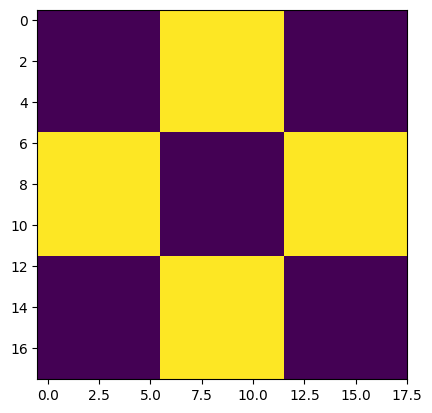

In [15]:
#Display the image
plt.imshow(cb_img)

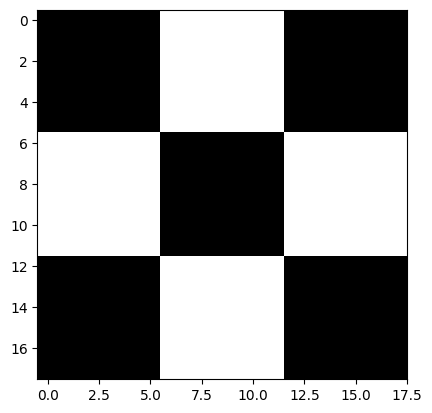

In [16]:
plt.imshow(cb_img, cmap="gray")

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

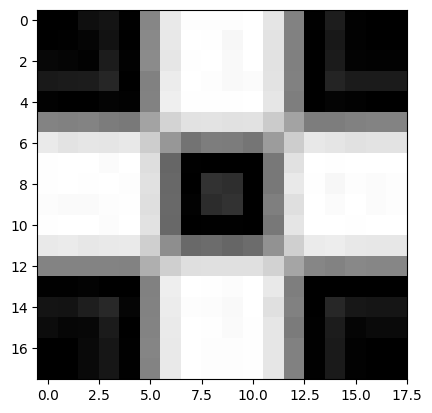

In [17]:
cmb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg", 0)

#print the image data, element of the image 2D numpy array
print(cmb_img_fuzzy)

#Display the image
plt.imshow(cmb_img_fuzzy, cmap="gray")

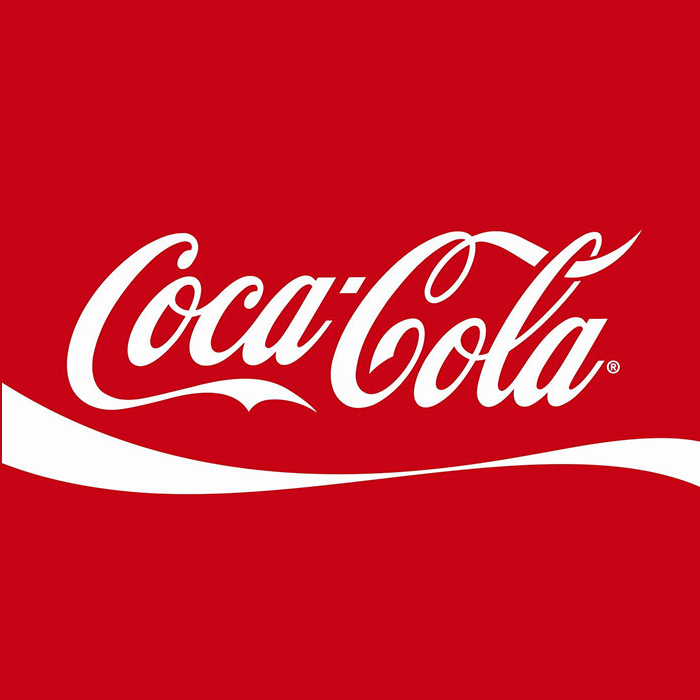

In [19]:
#Read cocacola image
Image("coca-cola-logo.png")

In [21]:
#Read the image as color
coke_img = cv2.imread("coca-cola-logo.png", 1) # 1 for color

#print the image data, element of the image 2D numpy array
print("Image size:", coke_img.size)

print("Image shape:", coke_img.shape)

print("Image data type:", coke_img.dtype)

Image size: 1470000
Image shape: (700, 700, 3)
Image data type: uint8


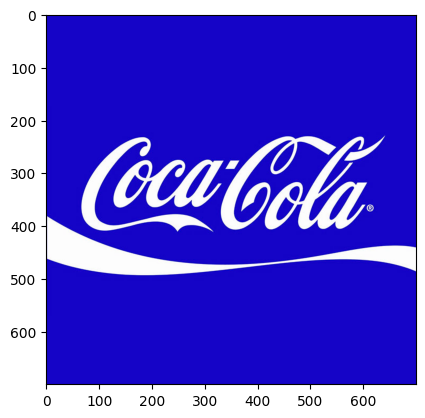

In [22]:
plt.imshow(coke_img) # Opencv workin in BGR for matplotlib RGB images

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

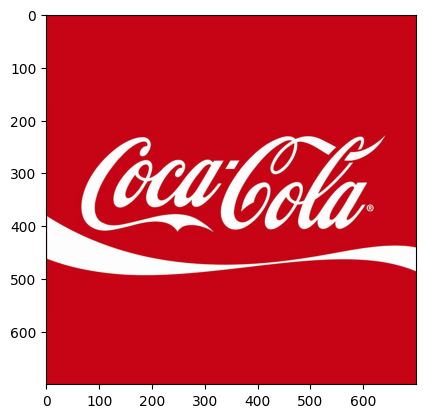

In [30]:
coke_img_channels_reversed = coke_img[:,:,::-1]
plt.imshow(coke_img_channels_reversed)

Splitting and Merging Color Channels
cv2.split() Divides a multi-channel array into several single-channel arrays.

cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged image')

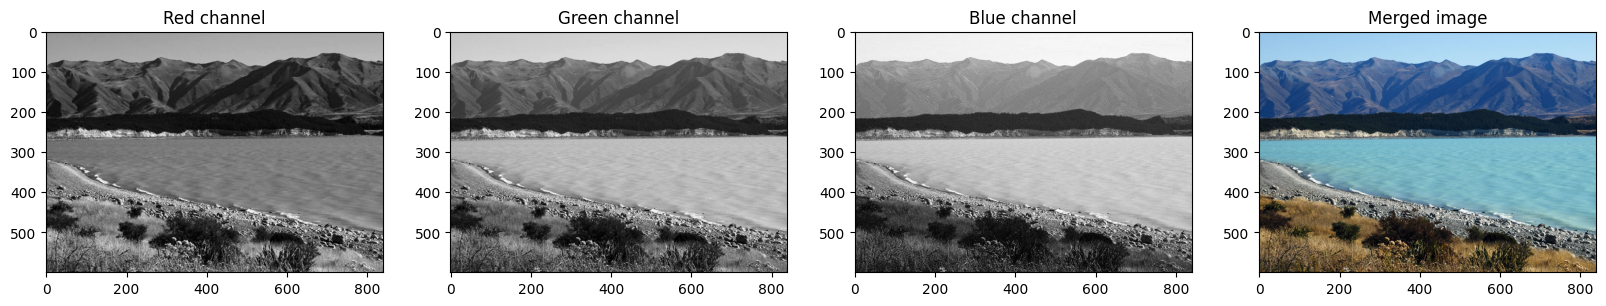

In [55]:
#split the image into channels
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", 1) # 1 for color
b,g,r = cv2.split(img_NZ_bgr)

#Show the channels
plt.figure(figsize=(20,5))
plt.subplot(1,4,1); plt.imshow(r, cmap="gray"); plt.title("Red channel")
plt.subplot(1,4,2); plt.imshow(g, cmap="gray"); plt.title("Green channel")
plt.subplot(1,4,3); plt.imshow(b, cmap="gray"); plt.title("Blue channel")

#Merge the channels
imgMerged = cv2.merge((b,g,r))

#Show the merged image
plt.subplot(1,4,4); plt.imshow(imgMerged[:,:,::-1]); plt.title("Merged image")

Converting to different Color Spaces
cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

Function Syntax
dst = cv2.cvtColor( src, code )
dst: Is the output image of the same size and depth as src.

The function has 2 required arguments:

src input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

code color space conversion code (see ColorConversionCodes).

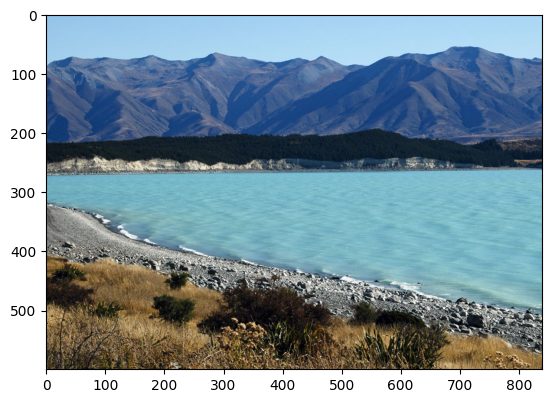

In [56]:
#change bgr to rgb
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

Text(0.5, 1.0, 'Merged image')

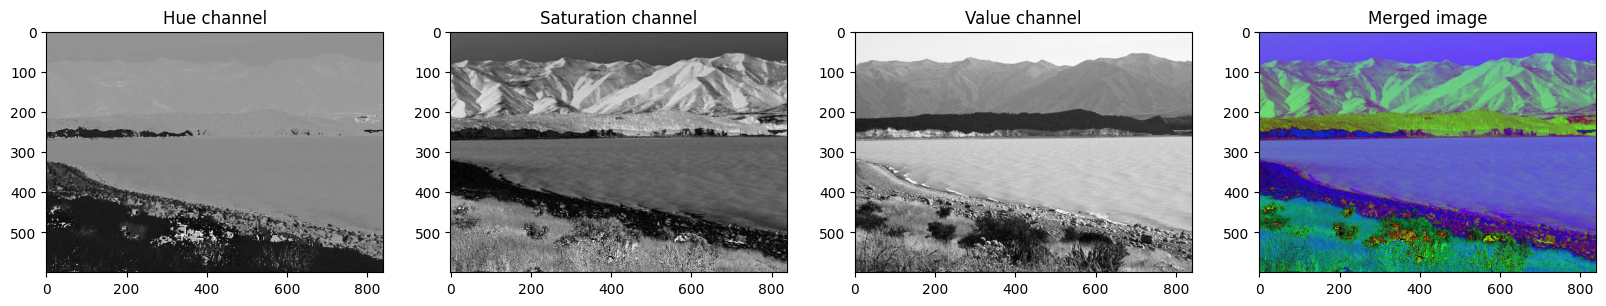

In [63]:
img_hsv = cv2.cvtColor(img_NZ_rgb, cv2.COLOR_RGB2HSV)
#split the image into channels
h,s,v = cv2.split(img_hsv)

#Show the channels
plt.figure(figsize=(20,5))
plt.subplot(1,4,1); plt.imshow(h, cmap="gray"); plt.title("Hue channel")
plt.subplot(1,4,2); plt.imshow(s, cmap="gray"); plt.title("Saturation channel")
plt.subplot(1,4,3); plt.imshow(v, cmap="gray"); plt.title("Value channel")
plt.subplot(1,4,4); plt.imshow(img_hsv[:,:,:]); plt.title("Merged image")

Text(0.5, 1.0, 'Original image')

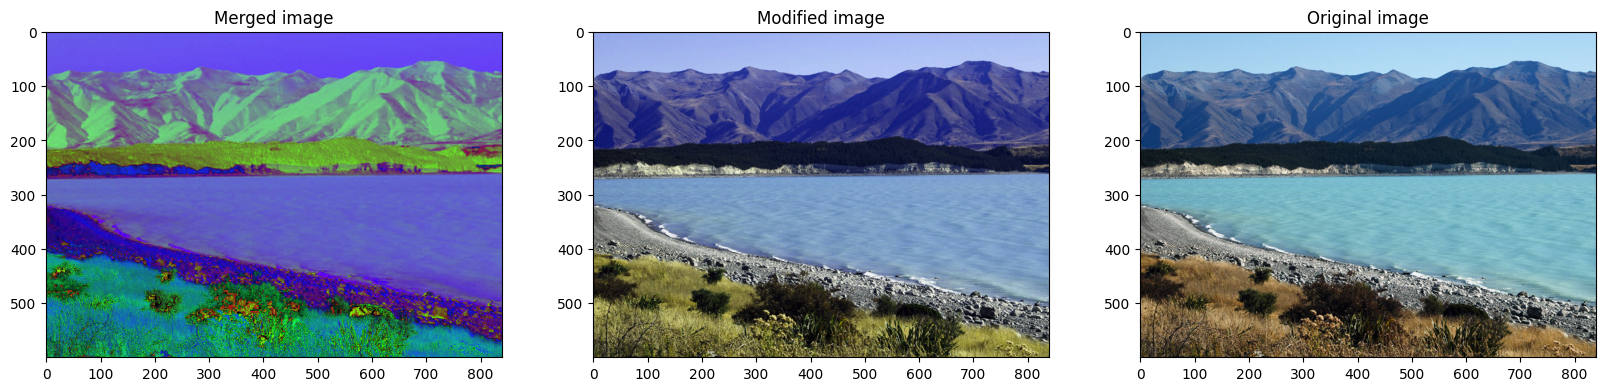

In [69]:
#Modify the hue channel
h_new = h+10
img_NZ_modified = cv2.merge((h_new,s,v))
img_NZ_rgb_modified = cv2.cvtColor(img_NZ_modified, cv2.COLOR_HSV2RGB)
img_NZ_bgr_modified = cv2.cvtColor(img_NZ_rgb_modified, cv2.COLOR_RGB2BGR)

#Show the modified image
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img_hsv[:,:,:]); plt.title("Merged image")
plt.subplot(1,3,2); plt.imshow(img_NZ_rgb_modified); plt.title("Modified image")
plt.subplot(1,3,3); plt.imshow(img_NZ_rgb); plt.title("Original image")

Saving Images
Saving the image is as trivial as reading an image in OpenCV. We use the function cv2.imwrite() with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

Function Syntax
cv2.imwrite( filename, img[, params] )
The function has 2 required arguments:

filename: This can be an absolute or relative path.

img: Image or Images to be saved.

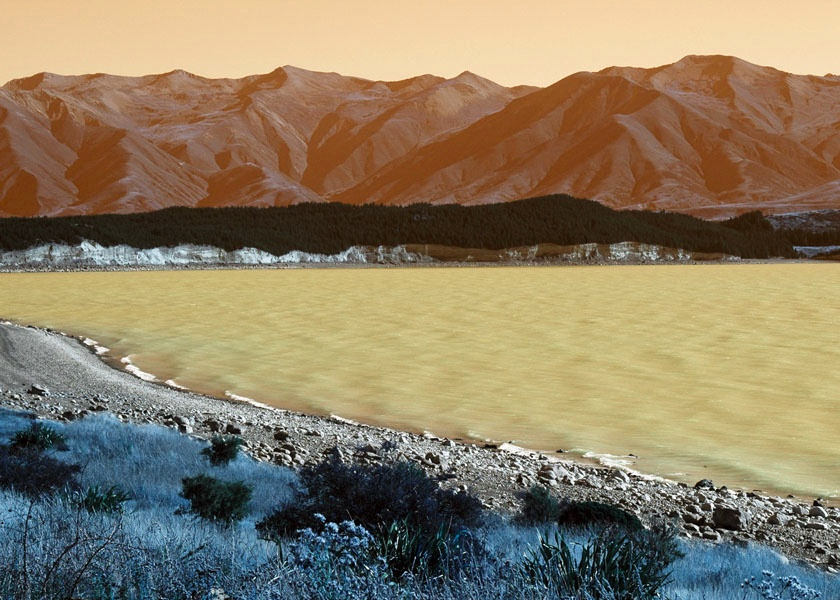

In [65]:
#save the modified image
cv2.imwrite("New_Zealand_Lake_modified.jpg", img_NZ_rgb_modified)

Image("New_Zealand_Lake_modified.jpg")